In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Helvetica')

# Data Preprocessing

In [5]:
nmf_genes_cancer_df = pd.read_csv('../../Summary_tables/nmf_top_genes_all.csv')
nmf_genes_cancer_df

,Gene,Cancer_Type
0,FOXA1,BRCA
1,ERBB4,BRCA
2,ELP2,BRCA
3,KDM4B,BRCA
4,RARA,BRCA
...,...,...
1009,SS18L2,PAAD
1010,UBE2T,PAAD
1011,PIWIL4,PAAD
1012,MST1,PAAD


In [6]:
pfi_groups = pd.read_csv('../../metadata/TCGA_nmf_cluster_pfi_prognostic_groups.csv',index_col=0)
pfi_groups

,1,2
ACC,low_pfi,high_pfi
KIRC,low_pfi,high_pfi
LGG,low_pfi,high_pfi
LIHC,high_pfi,low_pfi
LUAD,low_pfi,high_pfi
UCEC,low_pfi,high_pfi
STAD,high_pfi,low_pfi
PRAD,low_pfi,high_pfi
CRC,low_pfi,high_pfi


In [229]:
# top nmf genes from the pfi-significant cancers
total_nmf_genes = nmf_genes_cancer_df[nmf_genes_cancer_df['Cancer_Type'].isin(pfi_groups.index)]
total_nmf_genes.reset_index(drop=True, inplace=True)
unique_nmf_genes = total_nmf_genes['Gene'].unique()

In [230]:
# total_nmf_genes
np.unique(total_nmf_genes['Gene'],return_counts=True)

(array(['A1CF', 'ACTL6A', 'ACTL6B', 'ANP32E', 'APBB1', 'APOBEC3B',
        'APOBEC3C', 'ARNTL', 'ARRB1', 'ASF1B', 'ASXL2', 'ATAD2', 'ATRX',
        'ATXN7L3', 'AURKA', 'AURKB', 'BARD1', 'BAZ1A', 'BCORL1', 'BRCA1',
        'BRCA2', 'BRE', 'BRMS1L', 'BUB1', 'CBX2', 'CBX3', 'CBX4', 'CBX6',
        'CBX7', 'CDC6', 'CDK1', 'CDK17', 'CDK2', 'CDYL2', 'CECR2',
        'CHAF1A', 'CHAF1B', 'CHD3', 'CHD5', 'CHD9', 'CHEK1', 'CIT', 'CRB2',
        'CSRP2BP', 'DDB2', 'DEK', 'DNMT1', 'DNMT3A', 'DOT1L', 'DTX3L',
        'DZIP3', 'ELP3', 'ERBB4', 'EXOSC4', 'EXOSC5', 'EYA1', 'EYA2',
        'EYA4', 'EZH1', 'EZH2', 'FAM175A', 'FBRSL1', 'FOXO1', 'FOXP1',
        'FOXP2', 'FOXP4', 'GADD45A', 'GADD45B', 'GADD45G', 'GATAD1',
        'GTF2I', 'GTF3C4', 'HAT1', 'HCFC2', 'HDAC1', 'HDAC10', 'HDAC11',
        'HDAC4', 'HDAC5', 'HDAC6', 'HDAC9', 'HELLS', 'HJURP', 'HMG20B',
        'HMGN2', 'HMGN5', 'HR', 'IKZF1', 'IKZF3', 'INO80E', 'JADE1',
        'JADE2', 'JADE3', 'JDP2', 'KAT2A', 'KAT2B', 'KAT6B', 'KDM4B',
    

In [9]:
# read in labels (pfi group) and features (gene expression)
project='TCGA'
pfi_df = pd.DataFrame(columns=['Cancer','Group'])
gene_exp = pd.DataFrame(columns=unique_nmf_genes)
for cancer in pfi_groups.index:
    # append patient pfi group information
    cluster_file='../../%s_%s/03_nmf/Rank_2/nmf_lee_rank2_cluster_membership.csv'%(project,cancer)
    cluster_df = pd.read_csv(cluster_file,index_col=0)
    cluster_df['Group'] = list(pfi_groups.loc[cancer][cluster_df['cluster']-1])
    cluster_df['Cancer'] = cancer
    pfi_df = pfi_df.append(cluster_df[['Cancer','Group']])
    # append patient gene expression for pfi-significant top nmf genes
    gene_file = '../../%s_%s/RNA-seq_datasets/%s_epigenes_log2norm_counts.csv'%(project,cancer,cancer)
    gene_df = pd.read_csv(gene_file,index_col=0)
    gene_exp = gene_exp.append(gene_df.loc[unique_nmf_genes].T.loc[cluster_df.index])
    

In [10]:
gene_exp # 1416 patients, 208 top nmf genes

,TOP2A,PBK,HMGN2,NASP,AURKB,DNMT1,CDK1,PCNA,TRIM24,TP53,...,SMARCA1,HAT1,NEK6,MAPKAPK3,BRE,HDAC5,ATRX,CSRP2BP,ZNF217,JADE3
TCGA.OR.A5JA.01A,11.545598,10.068708,13.283055,11.470113,9.098094,11.232157,10.868419,11.939524,11.976643,10.719914,...,11.456939,10.330994,10.752302,11.755475,10.246279,11.443238,9.800685,9.753138,7.949305,9.806992
TCGA.OR.A5KY.01A,11.602318,10.667761,13.586522,12.187440,9.609678,11.759213,12.063369,12.646463,12.927681,12.230889,...,12.139389,10.543953,12.319617,10.339870,12.397403,10.021428,10.459500,9.692525,7.986525,9.813958
TCGA.OR.A5LJ.01A,10.951717,8.909184,12.967619,11.310077,8.281964,11.586285,11.197904,11.541939,12.422665,8.567434,...,12.013140,10.079965,9.816189,10.462276,9.955747,11.079803,9.731397,10.157526,9.443836,10.603692
TCGA.OR.A5K9.01A,12.304776,11.385125,13.056616,11.519398,9.314691,12.688467,11.874627,12.060946,13.924527,11.115901,...,12.230372,11.319953,9.454522,9.694824,9.903231,9.645433,10.817803,9.471293,8.695137,10.125055
TCGA.OR.A5JP.01A,10.274053,11.037812,13.374561,11.855177,8.406951,12.543487,11.776770,12.303145,11.674534,9.275218,...,12.677957,10.361232,12.657013,10.450761,11.127838,9.251196,10.062057,9.426438,8.465943,10.091495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.AA.3977.01A,12.137727,10.250954,11.645899,11.519691,10.149870,10.871092,11.417910,12.475233,9.891981,10.641603,...,7.448616,10.475549,10.630470,10.915013,8.917252,8.323283,9.873212,8.250351,10.158754,8.458939
TCGA.A6.4107.01A,10.400750,9.397673,11.377255,10.726930,8.756263,10.305778,10.231372,12.666249,9.712518,11.325851,...,6.766238,9.711183,11.070323,10.580368,9.091955,9.766210,9.267501,8.851428,9.819215,8.416288
TCGA.AA.3947.01A,12.365816,11.198119,12.221932,10.919515,8.767181,9.430210,12.235221,12.921699,10.017042,11.330932,...,6.540660,11.044298,9.399061,9.888371,9.541372,6.325589,10.438769,9.173742,10.057503,9.182915
TCGA.AA.3971.01A,11.030328,7.534094,11.134557,10.460886,8.398467,10.410970,9.766733,12.225642,9.497299,9.272784,...,6.778280,9.811817,10.269465,10.937773,9.771305,9.828001,9.868396,9.588212,10.456161,9.431418


In [11]:
pfi_df

,Cancer,Group
TCGA.OR.A5JA.01A,ACC,low_pfi
TCGA.OR.A5KY.01A,ACC,low_pfi
TCGA.OR.A5LJ.01A,ACC,low_pfi
TCGA.OR.A5K9.01A,ACC,low_pfi
TCGA.OR.A5JP.01A,ACC,low_pfi
...,...,...
TCGA.AA.3977.01A,CRC,high_pfi
TCGA.A6.4107.01A,CRC,high_pfi
TCGA.AA.3947.01A,CRC,high_pfi
TCGA.AA.3971.01A,CRC,high_pfi


In [12]:
all(pfi_df.index==gene_exp.index)

True

In [13]:
from sklearn.preprocessing import label_binarize
pfi_df['Group'] = label_binarize(pfi_df['Group'],classes=['low_pfi','high_pfi'])

# Data Split

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(gene_exp, pfi_df['Group'],test_size=0.2,random_state=0)

In [15]:
X_train.shape, X_test.shape

((1132, 208), (284, 208))

In [16]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([489, 643]))

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
LR = LogisticRegression(solver='liblinear',random_state=0)

In [18]:
LR.fit(X_t,y_t)
LR.score(X_t,y_t)


0.9359116022099447

In [19]:
LR.score(X_v, y_v)

0.7665198237885462

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
def plot_cm(clf, X, y, title, crossval=False, cv_obj=None, **kwargs):
    if crossval:
        y_hat = cross_val_predict(clf,X,y,cv=cv_obj)
    else:
        y_hat = clf.predict(X)
    disp = ConfusionMatrixDisplay.from_predictions(y,y_hat, display_labels=['low_pfi','high_pfi'], cmap=plt.cm.Blues,**kwargs)
    disp.ax_.set_title(title)
    
    return(disp)

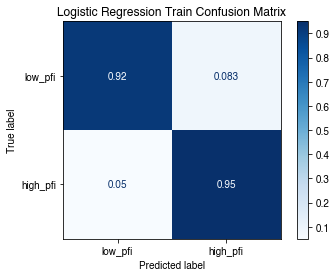

In [21]:
plot_cm(LR,X_t,y_t,'Logistic Regression Train Confusion Matrix', normalize="true");

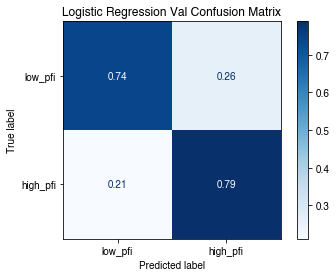

In [22]:
plot_cm(LR,X_v,y_v,'Logistic Regression Val Confusion Matrix', normalize="true");


# Cross Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
# initialize stratified kfold cross validator
skf = StratifiedKFold(n_splits=10)
from sklearn import metrics

train_idx = []
val_idx = []
for train,val in skf.split(X_train,y_train):
    train_idx.append(train)
    val_idx.append(val)

In [24]:
# function for cross validation with a classifier object as input
def cv(clf):
    # initialize lists for each performance metric for plotting
    acc = []
    pre = []
    rec = []
    f1 = []
    # perform cross validation, changing indices of train and validation set in each iteration.
    for train_index, validation_index in skf.split(X_train, y_train):
        # set train and validation sets
        X, X_val = X_train.iloc[train_index], X_train.iloc[validation_index]
        y, y_val = np.array(y_train)[train_index], np.array(y_train)[validation_index]
        # train model
        clf.fit(X, y)
        # append metrics
        for x,y,data in [(X,y, 'Training'),(X_val,y_val,'Validation')]:
            y_pred = clf.predict(x)
            acc.append(metrics.accuracy_score(y,y_pred))
            pre.append(metrics.precision_score(y,y_pred))
            rec.append(metrics.recall_score(y,y_pred))
            f1.append(metrics.f1_score(y,y_pred))

    train_acc, train_pre, train_rec, train_f1 = np.mean(acc[::2]), np.mean(pre[::2]), np.mean(rec[::2]), np.mean(f1[::2])
    val_acc, val_pre, val_rec, val_f1 = np.mean(acc[1::2]), np.mean(pre[1::2]), np.mean(rec[1::2]), np.mean(f1[1::2])
    metric_df = pd.DataFrame({'accuracy':[train_acc,val_acc],
                            'precision':[train_pre,val_pre],
                            'recall':[train_rec,val_rec],
                            'f1 score':[train_f1,val_f1]}, index=['training','validation'])
    return (metric_df)


In [25]:
from sklearn.inspection import permutation_importance
# feature importance wrapper function
def feat_importance(clf,X,y,title,save=True,method='perm', fitted=False):
    if fitted==False:
        clf.fit(X,y)
    if method=='perm':
        perm_importance = permutation_importance(clf, X, y,random_state=0,scoring='f1')
        sorted_idx = perm_importance.importances_mean.argsort()[-20:]
        plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
        plt.xlabel("Permutation Importance")
    elif method=='builtin':
        sorted_idx = clf.feature_importances_.argsort()[-20:]
        plt.xlabel("Feature Importance")
        plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
    plt.title(title)
    if save:
        plt.savefig("../../prognostic_ML_classifier/"+ title.replace(' ','_')+".png",dpi=300)
    plt.close()
    return X.columns[sorted_idx]

In [26]:
cv(LR)
    

,accuracy,precision,recall,f1 score
training,0.917060,0.921545,0.933473,0.927464
validation,0.810984,0.830906,0.838317,0.834359


In [27]:
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.8169014084507042

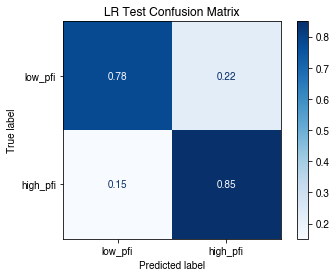

In [28]:
plot_cm(LR,X_test,y_test,'LR Test Confusion Matrix',normalize='true');

In [29]:
# alternate cv method
from sklearn import metrics
from sklearn.model_selection import cross_validate
metrics_dict = {'accuracy': metrics.make_scorer(metrics.accuracy_score),
           'precision': metrics.make_scorer(metrics.precision_score),
           'recall': metrics.make_scorer(metrics.recall_score),
           'f1': metrics.make_scorer(metrics.f1_score)}

In [30]:
cv_LR = pd.DataFrame(cross_validate(LR,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_LR.loc['Average'] = cv_LR.apply(np.mean,axis=0)
cv_LR

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.133568,0.006674,0.807018,0.830769,0.830769,0.830769
1,0.093163,0.005316,0.780702,0.822581,0.784615,0.803150
2,0.091508,0.006509,0.840708,0.861538,0.861538,0.861538
3,0.085830,0.004880,0.823009,0.854839,0.828125,0.841270
4,0.077993,0.004905,0.778761,0.791045,0.828125,0.809160
5,0.078945,0.005353,0.823009,0.843750,0.843750,0.843750
6,0.078691,0.004622,0.796460,0.815385,0.828125,0.821705
7,0.071691,0.004797,0.805310,0.818182,0.843750,0.830769
8,0.082524,0.004649,0.814159,0.811594,0.875000,0.842105
9,0.084840,0.004541,0.840708,0.859375,0.859375,0.859375


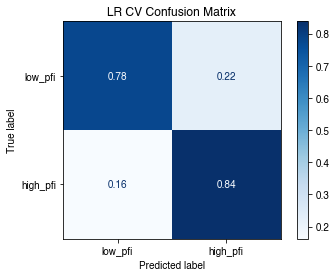

In [31]:
plot_cm(LR,X_train,y_train,'LR CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');

# Scaled Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
LR_scaled = make_pipeline(StandardScaler(),LR)


In [34]:
LR_scaled

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [35]:
cv_LR_scaled = pd.DataFrame(cross_validate(LR_scaled,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_LR_scaled.loc['Average'] = cv_LR_scaled.apply(np.mean,axis=0)
cv_LR_scaled

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.089869,0.007136,0.798246,0.818182,0.830769,0.824427
1,0.090225,0.005143,0.771930,0.809524,0.784615,0.796875
2,0.066599,0.004858,0.831858,0.848485,0.861538,0.854962
3,0.065083,0.004735,0.823009,0.854839,0.828125,0.841270
4,0.068574,0.004884,0.787611,0.794118,0.843750,0.818182
5,0.066320,0.004851,0.823009,0.843750,0.843750,0.843750
6,0.069236,0.004840,0.814159,0.830769,0.843750,0.837209
7,0.072261,0.004984,0.796460,0.805970,0.843750,0.824427
8,0.073261,0.006238,0.805310,0.808824,0.859375,0.833333
9,0.087195,0.006458,0.849558,0.861538,0.875000,0.868217


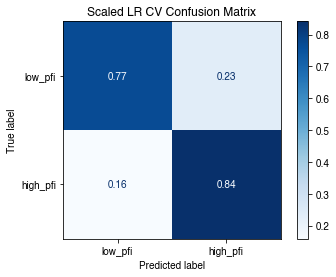

In [36]:
plot_cm(LR_scaled, X_train, y_train, 'Scaled LR CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/LR_CV_cm.png', dpi=300)

In [37]:
LR_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    LR_scaled_topfeats = feat_importance(LR_scaled, X_train.iloc[i,], y_train.iloc[i,],
                                     'LR Validation F1 Top Feature Importance',save=save)
    LR_topfeats_dict[idx] = LR_scaled_topfeats.sort_values()

In [38]:
LR_topfeats_dict

{0: Index(['ANP32E', 'ASF1B', 'CDK2', 'CHD5', 'CRB2', 'DNMT1', 'DTX3L', 'HDAC1',
        'HMG20B', 'KDM8', 'MAPKAPK3', 'NAP1L2', 'PARP3', 'RMI1', 'SMARCD3',
        'SS18L1', 'UCHL5', 'UHRF1', 'USP46', 'ZBTB7C'],
       dtype='object'),
 1: Index(['ATAD2', 'CHD3', 'ELP3', 'HDAC1', 'HDAC9', 'HJURP', 'IKZF1', 'KDM7A',
        'MINA', 'MST1', 'NEK6', 'PPP4R2', 'PRKAA2', 'RMI1', 'RPS6KA5', 'SFMBT2',
        'TOP2A', 'TTK', 'ZBTB16', 'ZNF516'],
       dtype='object'),
 2: Index(['CECR2', 'CRB2', 'DNMT3A', 'DOT1L', 'EYA1', 'EYA2', 'FOXP1', 'FOXP4',
        'HR', 'L3MBTL4', 'MTA3', 'NPM2', 'PPARGC1A', 'PPP4R2', 'PRDM8',
        'PRKAB1', 'PRMT6', 'TRIM24', 'VDR', 'YAF2'],
       dtype='object'),
 3: Index(['ACTL6A', 'CDYL2', 'ELP3', 'EYA1', 'EYA4', 'FOXO1', 'FOXP1', 'FOXP4',
        'HMGN5', 'HR', 'JADE1', 'PPARGC1A', 'PRDM11', 'PRDM8', 'RPS6KA5',
        'SATB2', 'SS18L2', 'UCHL5', 'YAF2', 'ZBTB16'],
       dtype='object'),
 4: Index(['ANP32E', 'AURKB', 'CDK2', 'ELP3', 'EZH2', 'FOXP4', 'HAT1

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
cv(RF)

,accuracy,precision,recall,f1 score
training,1.000000,1.000000,1.000000,1.000000
validation,0.894023,0.897953,0.919231,0.907738


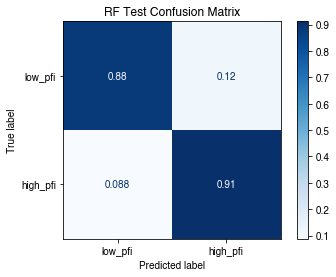

In [40]:
RF.fit(X_train,y_train)
plot_cm(RF,X_test,y_test,'RF Test Confusion Matrix',normalize='true');

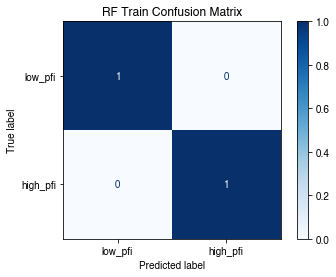

In [41]:
plot_cm(RF,X_train,y_train,'RF Train Confusion Matrix',normalize='true');

In [42]:
cv_RF = pd.DataFrame(cross_validate(RF,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_RF.loc['Average'] = cv_RF.apply(np.mean,axis=0)
cv_RF

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.758490,0.014936,0.894737,0.920635,0.892308,0.906250
1,0.750204,0.018867,0.859649,0.888889,0.861538,0.875000
2,0.789066,0.015501,0.929204,0.938462,0.938462,0.938462
3,0.718220,0.015608,0.867257,0.915254,0.843750,0.878049
4,0.698142,0.016804,0.849558,0.840580,0.906250,0.872180
5,0.674255,0.015584,0.938053,0.925373,0.968750,0.946565
6,0.680177,0.016735,0.929204,0.937500,0.937500,0.937500
7,0.667099,0.014744,0.920354,0.898551,0.968750,0.932331
8,0.696084,0.016489,0.893805,0.871429,0.953125,0.910448
9,0.750984,0.024070,0.858407,0.842857,0.921875,0.880597


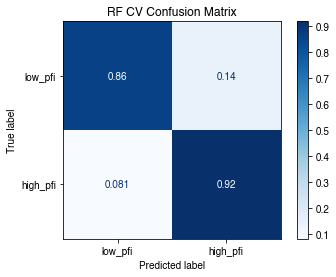

In [43]:
plot_cm(RF,X_train,y_train,'RF CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/RF_CV_cm.png', dpi=300)

In [44]:
# feature importance
RF_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    RF_topfeats = feat_importance(RF, X_train.iloc[i,], y_train.iloc[i,],
                                     'RF Validation F1 Top Feature Importance',save=save,method='builtin')
    RF_topfeats_dict[idx] = RF_topfeats.sort_values()

In [45]:
RF_topfeats_dict

{0: Index(['APBB1', 'ASF1B', 'AURKB', 'BUB1', 'CBX3', 'CDK1', 'CDK2', 'CHAF1A',
        'EXOSC5', 'EZH2', 'HDAC9', 'HELLS', 'KDM6A', 'MRGBP', 'MSH6', 'RAD54L',
        'SMARCD3', 'TONSL', 'UHRF1', 'USP46'],
       dtype='object'),
 1: Index(['APOBEC3B', 'ATAD2', 'AURKA', 'AURKB', 'CDK1', 'CDK2', 'CHAF1A', 'CHD5',
        'CHEK1', 'EXOSC5', 'FBRSL1', 'HDAC4', 'HJURP', 'MRGBP', 'RAD51',
        'RAD54L', 'TONSL', 'TTK', 'VRK1', 'ZNF516'],
       dtype='object'),
 2: Index(['ARNTL', 'AURKB', 'CDC6', 'CDK1', 'CDK2', 'CECR2', 'CHAF1A', 'CHEK1',
        'DNMT3A', 'DOT1L', 'EZH2', 'FOXP1', 'HDAC5', 'KAT2A', 'MBD3', 'NAP1L2',
        'TONSL', 'TTK', 'ZGPAT', 'ZNF516'],
       dtype='object'),
 3: Index(['ACTL6B', 'APOBEC3B', 'ATAD2', 'ATRX', 'BUB1', 'CBX4', 'CDK2', 'CHAF1A',
        'CHAF1B', 'DNMT3A', 'DOT1L', 'ELP3', 'EZH2', 'MSH6', 'PBK', 'RAD51',
        'RCC1', 'TLE1', 'TONSL', 'TTK'],
       dtype='object'),
 4: Index(['AURKB', 'BRCA1', 'BUB1', 'CBX4', 'CBX7', 'CDK2', 'CHAF1A', 'DNMT1',


# Support Vector Classifier

In [46]:
from sklearn.svm import SVC
SV = SVC(random_state=0)
cv(SV)

,accuracy,precision,recall,f1 score
training,0.922456,0.907815,0.961118,0.933697
validation,0.878955,0.866800,0.931563,0.897648


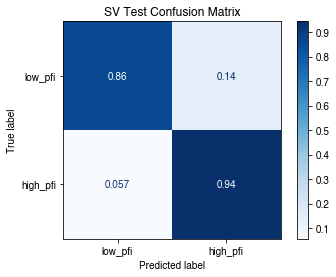

In [47]:
SV.fit(X_train,y_train)
plot_cm(SV, X_test, y_test, 'SV Test Confusion Matrix',normalize='true');

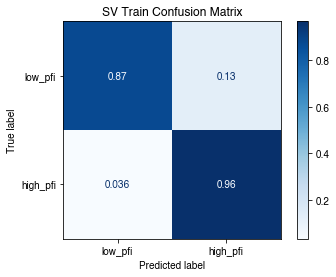

In [48]:
plot_cm(SV, X_train, y_train, 'SV Train Confusion Matrix',normalize='true');

In [49]:
cv_SV = pd.DataFrame(cross_validate(SV,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_SV.loc['Average'] = cv_SV.apply(np.mean,axis=0)
cv_SV

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.085042,0.021997,0.903509,0.897059,0.938462,0.917293
1,0.066621,0.019703,0.877193,0.859155,0.938462,0.897059
2,0.061439,0.017388,0.867257,0.857143,0.923077,0.888889
3,0.055987,0.017163,0.911504,0.935484,0.906250,0.920635
4,0.053361,0.016856,0.814159,0.794521,0.906250,0.846715
5,0.054132,0.017147,0.876106,0.857143,0.937500,0.895522
6,0.054088,0.016971,0.884956,0.869565,0.937500,0.902256
7,0.054079,0.019041,0.867257,0.855072,0.921875,0.887218
8,0.063173,0.017238,0.911504,0.885714,0.968750,0.925373
9,0.057917,0.017188,0.876106,0.857143,0.937500,0.895522


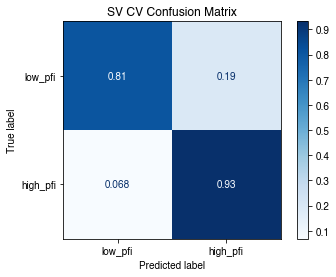

In [50]:
plot_cm(SV, X_train, y_train, 'SV CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');

## Try Feature Scaling for SVM

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [52]:
SV_scaled = make_pipeline(StandardScaler(),SV,)


In [53]:
SV_scaled

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [54]:
cv_SV_scaled = pd.DataFrame(cross_validate(SV_scaled,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_SV_scaled.loc['Average'] = cv_SV_scaled.apply(np.mean,axis=0)
cv_SV_scaled

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.063623,0.015952,0.929825,0.952381,0.923077,0.937500
1,0.052072,0.015622,0.903509,0.909091,0.923077,0.916031
2,0.054822,0.016568,0.911504,0.910448,0.938462,0.924242
3,0.051739,0.015414,0.911504,0.935484,0.906250,0.920635
4,0.050719,0.015008,0.840708,0.828571,0.906250,0.865672
5,0.051740,0.015550,0.946903,0.953125,0.953125,0.953125
6,0.065142,0.021349,0.902655,0.907692,0.921875,0.914729
7,0.053382,0.019624,0.929204,0.911765,0.968750,0.939394
8,0.072014,0.016616,0.946903,0.939394,0.968750,0.953846
9,0.055683,0.019016,0.938053,0.938462,0.953125,0.945736


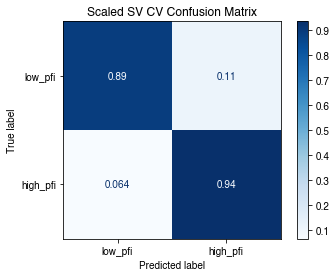

In [55]:
plot_cm(SV_scaled, X_train, y_train, 'Scaled SV CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/SV_CV_cm.png', dpi=300)

In [56]:
# feature importance
SV_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    SV_scaled_topfeats = feat_importance(SV_scaled, X_train.iloc[i,], y_train.iloc[i,],
                                     'SV Validation F1 Top Feature Importance',save=save)
    SV_topfeats_dict[idx] = SV_scaled_topfeats.sort_values()

In [57]:
SV_topfeats_dict

{0: Index(['ASXL2', 'BARD1', 'BAZ1A', 'CHEK1', 'DEK', 'FAM175A', 'FOXO1', 'HDAC1',
        'HMGN2', 'KDM6A', 'NPAS2', 'PCGF5', 'PRKDC', 'RMI1', 'SATB2', 'SHPRH',
        'SS18L1', 'TET2', 'WHSC1', 'ZBTB7C'],
       dtype='object'),
 1: Index(['CBX4', 'CBX6', 'CBX7', 'CECR2', 'CHD3', 'EXOSC4', 'FAM175A', 'FBRSL1',
        'FOXP4', 'GATAD1', 'HDAC6', 'KDM7A', 'MAZ', 'MBD3', 'RPS6KA5', 'SS18L2',
        'TAF9', 'TFPT', 'TONSL', 'ZBTB7C'],
       dtype='object'),
 2: Index(['APBB1', 'BRE', 'CBX6', 'CECR2', 'CHEK1', 'DDB2', 'ELP3', 'FOXP4',
        'GADD45B', 'GATAD1', 'HR', 'MOV10', 'NPM2', 'RARA', 'SMARCD3', 'TAF9',
        'USP11', 'WDR77', 'YEATS2', 'ZBTB16'],
       dtype='object'),
 3: Index(['ARRB1', 'ASF1B', 'AURKA', 'BUB1', 'CDK1', 'CDK2', 'CHAF1A', 'CHAF1B',
        'CHEK1', 'EXOSC4', 'HELLS', 'HJURP', 'NPM2', 'PBK', 'PCNA', 'RAD51',
        'RMI1', 'TOP2A', 'TTK', 'UBE2T'],
       dtype='object'),
 4: Index(['APOBEC3B', 'ARNTL', 'ASXL2', 'BARD1', 'BCORL1', 'BRCA1', 'BRCA2',
     

# XG Boost

In [58]:
from xgboost import XGBClassifier
import shap

In [59]:
xgb = XGBClassifier(n_estimators=100,random_state=0)


In [60]:
cv_xgb = pd.DataFrame(cross_validate(xgb,X_train,y_train,cv=skf,scoring=metrics_dict))
cv_xgb.loc['Average'] = cv_xgb.apply(np.mean,axis=0)
cv_xgb

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,2.423802,0.027069,0.912281,0.936508,0.907692,0.921875
1,2.204967,0.009518,0.877193,0.892308,0.892308,0.892308
2,3.139351,0.010730,0.911504,0.910448,0.938462,0.924242
3,1.935748,0.009744,0.893805,0.919355,0.890625,0.904762
4,2.041257,0.009653,0.849558,0.830986,0.921875,0.874074
5,1.734604,0.009883,0.911504,0.897059,0.953125,0.924242
6,1.879075,0.011304,0.902655,0.907692,0.921875,0.914729
7,1.570173,0.024432,0.902655,0.884058,0.953125,0.917293
8,1.573815,0.015987,0.893805,0.919355,0.890625,0.904762
9,1.845588,0.012743,0.893805,0.893939,0.921875,0.907692


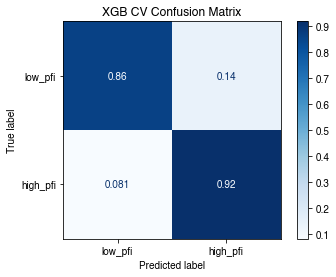

In [61]:
plot_cm(xgb, X_train, y_train, 'XGB CV Confusion Matrix',crossval=True,cv_obj=skf,normalize='true');
plt.savefig('../../prognostic_ML_classifier/XGB_CV_cm.png', dpi=300)

In [62]:
# feature importance
XGB_topfeats_dict = {}
for idx,i in enumerate(val_idx):
    if idx==0:
        save=True
    else:
        save=False
    XGB_topfeats = feat_importance(xgb, X_train.iloc[i,], y_train.iloc[i,],
                                     'XGB Validation F1 Top Feature Importance',save=save,method='builtin')
    XGB_topfeats_dict[idx] = XGB_topfeats.sort_values()

In [63]:
XGB_topfeats_dict

{0: Index(['APBB1', 'CBX3', 'CDK1', 'CDK2', 'FOXP4', 'HDAC6', 'HR', 'KAT2A',
        'KDM7A', 'MAPKAPK3', 'MOV10', 'NAA60', 'PARP3', 'PCGF5', 'RARA',
        'SMARCD3', 'TONSL', 'TRIM16', 'UCHL5', 'USP46'],
       dtype='object'),
 1: Index(['ANP32E', 'ATXN7L3', 'AURKB', 'BARD1', 'BRCA2', 'CHD5', 'CHEK1', 'CIT',
        'EXOSC4', 'EXOSC5', 'GADD45G', 'HJURP', 'IKZF3', 'JDP2', 'MBD3', 'MDC1',
        'NAP1L2', 'PRDM16', 'TONSL', 'ZNF217'],
       dtype='object'),
 2: Index(['AURKB', 'BRCA1', 'CBX7', 'CDK2', 'CHAF1A', 'DOT1L', 'ERBB4', 'EZH2',
        'HDAC10', 'HR', 'INO80E', 'KAT2A', 'KDM8', 'L3MBTL4', 'MINA', 'RUVBL1',
        'SS18L2', 'TONSL', 'VDR', 'ZGPAT'],
       dtype='object'),
 3: Index(['A1CF', 'APOBEC3B', 'ATAD2', 'ATRX', 'BUB1', 'CBX4', 'CDK1', 'CHD5',
        'FBRSL1', 'IKZF1', 'IKZF3', 'JADE2', 'MRGBP', 'NAA60', 'RAD51',
        'SMARCD3', 'SMYD2', 'SP100', 'TONSL', 'USP12'],
       dtype='object'),
 4: Index(['BUB1', 'CBX3', 'CDK2', 'CHAF1A', 'CHAF1B', 'CHEK1', 'DNMT1',

# Feature Importance

# XGBoost and Random Forest Built-in Feature Importance 

In [64]:
xgb.fit(X_test,y_test)
xgb.feature_importances_.mean()

0.004807692

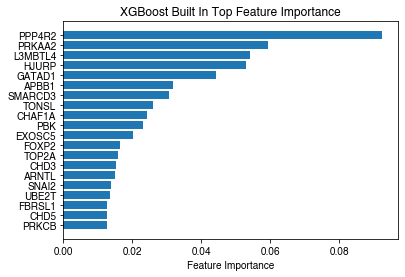

In [65]:
sorted_idx = xgb.feature_importances_.argsort()[-20:]
plt.xlabel("Feature Importance")
plt.barh(X_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.title("XGBoost Built In Top Feature Importance")
plt.savefig("XGB_built_in_feature_importance.png",dpi=300)

In [66]:
RF.fit(X_test,y_test)
RF.feature_importances_.mean()

0.004807692307692308

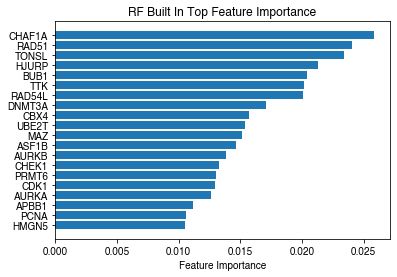

In [67]:
sorted_idx = RF.feature_importances_.argsort()[-20:]
plt.xlabel("Feature Importance")
plt.barh(X_train.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.title("RF Built In Top Feature Importance")
plt.savefig("RF_built_in_feature_importance.png",dpi=300)

# Best Model: Scaled SVM

In [68]:
SV_scaled.fit(X_train,y_train)
SV_scaled.score(X_test,y_test)

0.9190140845070423

In [69]:
metrics.f1_score(y_test,SV_scaled.predict(X_test))


0.9283489096573208

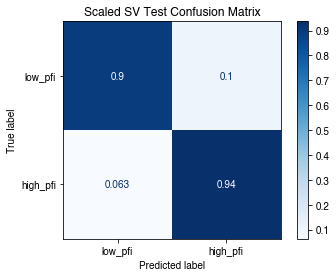

In [70]:
plot_cm(SV_scaled, X_test, y_test, 'Scaled SV Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/SV_Test_cm.png', dpi=300)

## Shap feature importance

In [71]:
import shap

In [90]:
X_test.shape

(284, 208)

In [3]:
# explain all the predictions in the test set
# explainer = shap.KernelExplainer(SV_scaled.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [74]:
explainer = shap.KernelExplainer(SV_scaled.predict, X_test)

X does not have valid feature names, but StandardScaler was fitted with feature names
Using 284 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [79]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/284 [00:00<?, ?it/s]

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' wi

In [155]:
shap_values

array([[ 0.03414862,  0.01984058,  0.00300811, ..., -0.018     ,
        -0.00447358,  0.00921363],
       [ 0.04740917,  0.02370134, -0.04831101, ..., -0.02700834,
         0.01254023,  0.        ],
       [-0.02310582, -0.00735315, -0.01698268, ..., -0.0061651 ,
         0.00173918, -0.00414158],
       ...,
       [ 0.01224292,  0.02300416,  0.01528589, ..., -0.00517462,
         0.01701962,  0.01452585],
       [-0.01644805, -0.00717597, -0.01408373, ...,  0.        ,
         0.        , -0.00295281],
       [-0.00547021, -0.00950398,  0.        , ..., -0.01153803,
        -0.00243235,  0.        ]])

In [159]:
sorted_idx = shap_values.argsort()
# plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

In [172]:
feature_names = X_train.columns
res = pd.DataFrame(shap_values, columns = feature_names)
vals = np.abs(res.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance = shap_importance.reset_index(drop=True)

In [174]:
shap_importance.to_csv('../../prognostic_ML_classifier/top_shap_feature_SV.csv',index=False)

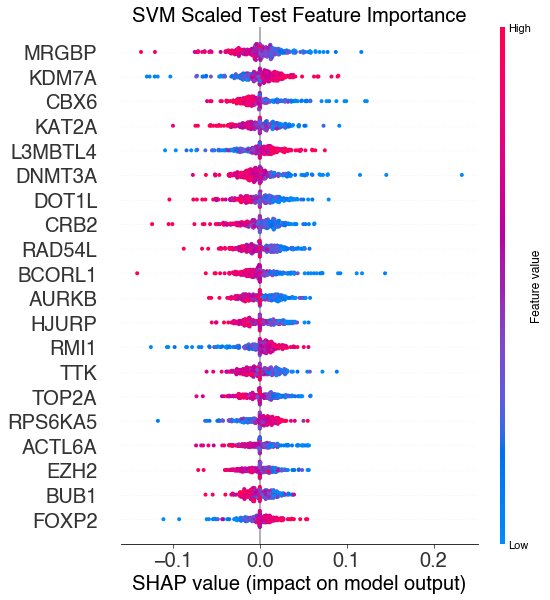

In [139]:
p=plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Make the modifications that you want
ax.set_title('SVM Scaled Test Feature Importance', fontdict={"size":20})
ax.tick_params(labelsize=20)
ax.set_xlabel(ax.get_xlabel(),fontsize=20);

p.savefig('../../prognostic_ML_classifier/SV_test_shap_summary.png',  bbox_inches='tight', facecolor='white', dpi=300)

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Correlation: Expression of MRGBP is negatively correlated with pfi prognosis.

In [70]:
# permutation feature importance
SV_scaled_topfeats_test = feat_importance(SV_scaled, X_test, y_test,
                                          'SV Test F1 Top Feature Importance',save=True,fitted=True)

# Final RF

In [73]:
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.897887323943662

In [74]:
metrics.f1_score(y_test,RF.predict(X_test))


0.9090909090909092

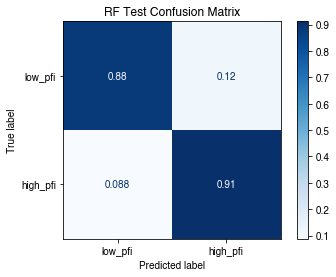

In [75]:
plot_cm(RF, X_test, y_test, 'RF Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/RF_Test_cm.png', dpi=300)

In [76]:
RF_topfeats_test = feat_importance(RF, X_test, y_test,
                                          'RF Test F1 Top Feature Importance',save=True, method='builtin',fitted=True)

In [77]:
RF_topfeats_test

Index(['RAD51', 'DOT1L', 'CDC6', 'CBX4', 'L3MBTL4', 'PCNA', 'BUB1', 'KDM7A',
       'ANP32E', 'RAD54L', 'FBRSL1', 'AURKA', 'CDK1', 'TTK', 'EZH2', 'HJURP',
       'CHAF1A', 'MRGBP', 'AURKB', 'TONSL'],
      dtype='object')

# Final XGB

In [78]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)


0.9014084507042254

In [79]:
metrics.f1_score(y_test,xgb.predict(X_test))


0.9130434782608695

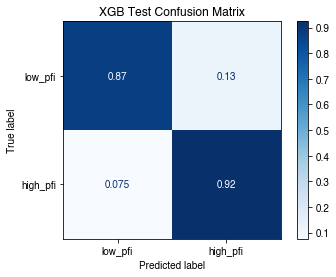

In [80]:
plot_cm(xgb, X_test, y_test, 'XGB Test Confusion Matrix',normalize='true');
plt.savefig('../../prognostic_ML_classifier/XGB_Test_cm.png', dpi=300)

In [81]:
XGB_topfeats_test = feat_importance(xgb, X_test, y_test,
                                          'XGB Test F1 Top Feature Importance',save=True, method='builtin',fitted=True)
XGB_topfeats_test

Index(['BARD1', 'IKZF1', 'BCORL1', 'CHAF1A', 'EZH2', 'HJURP', 'MAPKAPK3',
       'L3MBTL4', 'ATAD2', 'NAA60', 'NASP', 'AURKB', 'SP100', 'MINA', 'MRGBP',
       'WHSC1', 'PRKCA', 'WSB2', 'TONSL', 'BRCA2'],
      dtype='object')

# compare misclassified patients across models

In [82]:
X_t, y_t, X_v, y_v = X_train.iloc[train_idx[0],], y_train.iloc[train_idx[0],], X_train.iloc[val_idx[0],], y_train.iloc[val_idx[0],]

{'FP': {'TCGA.BP.4977.01A', 'TCGA.BR.8371.01A', 'TCGA.DU.8167.01A'},
 'FN': {'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.AA.3679.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.QU.A6IP.01A'},
 'All': {'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.AA.3679.01A',
  'TCGA.BP.4977.01A',
  'TCGA.BR.8371.01A',
  'TCGA.DU.8167.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.QU.A6IP.01A'}}

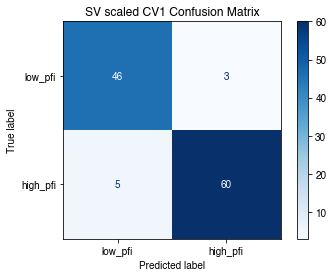

In [83]:
SV_scaled.fit(X_t, y_t)
SV_pred = SV_scaled.predict(X_v)
# SV_scaled_preddf = pd.DataFrame({'Patient':X_train.index[val_idx[0]],
#                            'Predict':SV_scaled.predict(X_train.iloc[val_idx[0],]),
#                            'Truth':y_train.iloc[val_idx[0],]})
SV_scaled_fpred = {'FP': set(y_v.index[np.where(SV_pred>y_v)]),
                   'FN': set(y_v.index[np.where(SV_pred<y_v)]),
                  'All': set(y_v.index[np.where(SV_pred!=y_v)])}
plot_cm(SV_scaled, X_v, y_v, 'SV scaled CV1 Confusion Matrix')
SV_scaled_fpred

{'FP': {'TCGA.BP.4977.01A',
  'TCGA.DU.6542.01A',
  'TCGA.DU.7014.01A',
  'TCGA.DU.8167.01A',
  'TCGA.KC.A4BN.01A'},
 'FN': {'TCGA.55.7283.01A',
  'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.BG.A18A.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.HC.7078.01A',
  'TCGA.XJ.A83H.01A'},
 'All': {'TCGA.55.7283.01A',
  'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.BG.A18A.01A',
  'TCGA.BP.4977.01A',
  'TCGA.DU.6542.01A',
  'TCGA.DU.7014.01A',
  'TCGA.DU.8167.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.HC.7078.01A',
  'TCGA.KC.A4BN.01A',
  'TCGA.XJ.A83H.01A'}}

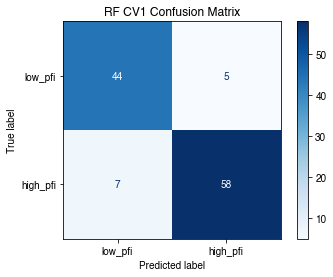

In [84]:
RF.fit(X_t,y_t)
RF_pred = RF.predict(X_v)
RF_fpred = {'FP': set(y_v.index[np.where(RF_pred>y_v)]),
            'FN': set(y_v.index[np.where(RF_pred<y_v)]),
           'All': set(y_v.index[np.where(RF_pred!=y_v)])}
plot_cm(RF,X_v,y_v,title='RF CV1 Confusion Matrix');
RF_fpred

{'FP': {'TCGA.BP.4977.01A',
  'TCGA.BR.8371.01A',
  'TCGA.DU.7014.01A',
  'TCGA.KC.A4BN.01A'},
 'FN': {'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.AA.3679.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.G9.6361.01A',
  'TCGA.HC.7078.01A'},
 'All': {'TCGA.69.7980.01A',
  'TCGA.86.7713.01A',
  'TCGA.AA.3679.01A',
  'TCGA.BP.4977.01A',
  'TCGA.BR.8371.01A',
  'TCGA.DU.7014.01A',
  'TCGA.EJ.8470.01A',
  'TCGA.G9.6361.01A',
  'TCGA.HC.7078.01A',
  'TCGA.KC.A4BN.01A'}}

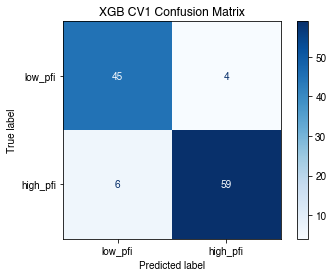

In [85]:
xgb.fit(X_t,y_t)
xgb_pred = xgb.predict(X_v)
xgb_fpred = {'FP': set(y_v.index[np.where(xgb_pred>y_v)]),
            'FN': set(y_v.index[np.where(xgb_pred<y_v)]),
            'All': set(y_v.index[np.where(xgb_pred!=y_v)])}
plot_cm(xgb,X_v,y_v,title='XGB CV1 Confusion Matrix');
xgb_fpred

In [86]:
SV_scaled_fpred['All'].intersection(RF_fpred['All'])

{'TCGA.69.7980.01A',
 'TCGA.86.7713.01A',
 'TCGA.BP.4977.01A',
 'TCGA.DU.8167.01A',
 'TCGA.EJ.8470.01A'}

In [87]:
SV_scaled_fpred['All'].intersection(xgb_fpred['All'])

{'TCGA.69.7980.01A',
 'TCGA.86.7713.01A',
 'TCGA.AA.3679.01A',
 'TCGA.BP.4977.01A',
 'TCGA.BR.8371.01A',
 'TCGA.EJ.8470.01A'}

In [88]:
xgb_fpred['All'].intersection(RF_fpred['All'])

{'TCGA.69.7980.01A',
 'TCGA.86.7713.01A',
 'TCGA.BP.4977.01A',
 'TCGA.DU.7014.01A',
 'TCGA.EJ.8470.01A',
 'TCGA.HC.7078.01A',
 'TCGA.KC.A4BN.01A'}

In [89]:
mc = xgb_fpred['All'].intersection(RF_fpred['All']).intersection(SV_scaled_fpred['All'])

In [90]:
model_pred_df = pd.DataFrame({'Patient': y_v.index,
                           'SV_scaled_pred': SV_pred,
                           'RF_pred': RF_pred,
                           'XGB_pred': xgb_pred,
                             'Truth': y_v})

In [91]:
model_pred_df

,Patient,SV_scaled_pred,RF_pred,XGB_pred,Truth
TCGA.HT.7605.01A,TCGA.HT.7605.01A,1,1,1,1
TCGA.BR.8371.01A,TCGA.BR.8371.01A,1,0,1,0
TCGA.FG.6688.01A,TCGA.FG.6688.01A,0,0,0,0
TCGA.DU.6397.01A,TCGA.DU.6397.01A,1,1,1,1
TCGA.78.7150.01A,TCGA.78.7150.01A,0,0,0,0
...,...,...,...,...,...
TCGA.55.1596.01A,TCGA.55.1596.01A,0,0,0,0
TCGA.BR.8365.01A,TCGA.BR.8365.01A,0,0,0,0
TCGA.HC.8261.01A,TCGA.HC.8261.01A,0,0,0,0
TCGA.BP.4977.01A,TCGA.BP.4977.01A,1,1,1,0


In [92]:
from matplotlib_venn import venn3, venn3_unweighted
from matplotlib import pyplot as plt

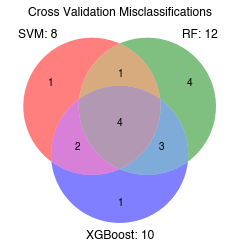

In [93]:
# depict venn diagram
# venn3(subsets=(20, 10, 12, 10, 9, 4, 3), 
#       set_labels=('Group A', 'Group B', 'Group C'), 
#       set_colors=("orange", "blue", "red"), alpha=0.7)
  
# # outline of circle line style and width
# venn3_circles(subsets=(20, 10, 12, 10, 9, 4, 3),
#               linestyle="dashed", linewidth=2)
venn3_unweighted(subsets=[SV_scaled_fpred['All'], RF_fpred['All'], xgb_fpred['All']],
     set_labels = ['SVM: %d'%len(SV_scaled_fpred['All']),'RF: %d'%len(RF_fpred['All']),'XGBoost: %d'%len(xgb_fpred['All'])],
      alpha=0.5)
# title of the venn diagram
plt.title("Cross Validation Misclassifications")
# plt.show()
plt.savefig('../../prognostic_ML_classifier/missclass_venn.png', dpi=300)

In [94]:
SV_scaled_topfeats_test

Index(['DZIP3', 'HMGN5', 'PBK', 'HDAC4', 'SIRT6', 'NAP1L2', 'MRGBP', 'CHD5',
       'HDAC9', 'CBX4', 'USP11', 'NPAS2', 'PHF19', 'IKZF3', 'MBD3', 'KDM7A',
       'FOXP2', 'CRB2', 'IKZF1', 'PPP4R2'],
      dtype='object')

In [95]:
RF_topfeats_test

Index(['RAD51', 'DOT1L', 'CDC6', 'CBX4', 'L3MBTL4', 'PCNA', 'BUB1', 'KDM7A',
       'ANP32E', 'RAD54L', 'FBRSL1', 'AURKA', 'CDK1', 'TTK', 'EZH2', 'HJURP',
       'CHAF1A', 'MRGBP', 'AURKB', 'TONSL'],
      dtype='object')

In [96]:
XGB_topfeats_test

Index(['BARD1', 'IKZF1', 'BCORL1', 'CHAF1A', 'EZH2', 'HJURP', 'MAPKAPK3',
       'L3MBTL4', 'ATAD2', 'NAA60', 'NASP', 'AURKB', 'SP100', 'MINA', 'MRGBP',
       'WHSC1', 'PRKCA', 'WSB2', 'TONSL', 'BRCA2'],
      dtype='object')

In [97]:
feature_df = pd.DataFrame({'Feature': list(SV_scaled_topfeats_test)+ list(RF_topfeats_test) + list(XGB_topfeats_test),
             'Model': ['SV']*len(SV_scaled_topfeats_test)+['RF']*len(RF_topfeats_test)+['XGB']*len(XGB_topfeats_test)})

In [98]:
feature_df.to_csv('../../prognostic_ML_classifier/top_feature_SV_RF_XGB.csv',index=False)

# Prediction on PAAD

In [264]:
# read in labels (pfi group) and features (gene expression)
project='TCGA'
pfi_df = pd.DataFrame(columns=['Cancer','Group'])
gene_exp = pd.DataFrame(columns=unique_nmf_genes)

cluster_file='../../%s_%s/supplemental/Tan_PDAC_supplemental2.xlsx'%(project,'PAAD')
cluster_df = pd.read_excel(cluster_file, sheet_name='Cluster assignments',skiprows=[0])[['TCGA_patient_id','IR']]
cluster_df['TCGA_patient_id'].str.strip()
cluster_df['TCGA_patient_id'] = cluster_df['TCGA_patient_id'].str.replace('-','.')+'.01A'
cluster_df['IR'].replace([1,2],['low_pfi','high_pfi'],inplace=True)
cluster_df['IR'] = label_binarize(cluster_df['IR'],classes=['low_pfi','high_pfi'])
gene_file = '../../%s_%s/RNA-seq_datasets/%s_epigenes_log2norm_counts.csv'%(project,'PAAD','PAAD')
gene_df = pd.read_csv(gene_file,index_col=0).T
gene_df = gene_df.loc[cluster_df['TCGA_patient_id']][unique_nmf_genes]

In [265]:
gene_df

,TOP2A,PBK,HMGN2,NASP,AURKB,DNMT1,CDK1,PCNA,TRIM24,TP53,...,SMARCA1,HAT1,NEK6,MAPKAPK3,BRE,HDAC5,ATRX,CSRP2BP,ZNF217,JADE3
TCGA.2J.AAB1.01A,10.521871,7.731995,12.220505,11.790577,8.673501,11.121701,9.380666,11.387091,10.053887,11.547950,...,10.794619,10.190164,10.681360,11.212074,10.858539,11.807869,11.338662,10.461149,10.569805,9.075309
TCGA.2J.AAB6.01A,12.007651,7.945284,13.012619,12.095831,9.929583,11.539816,10.818779,11.477143,10.429644,11.497700,...,10.891463,10.442956,11.348655,12.143493,10.450884,11.695854,11.116657,8.997526,12.489133,8.392180
TCGA.2J.AABA.01A,10.884663,7.465138,11.659137,11.604809,8.163187,10.836440,8.411269,10.807868,10.713465,11.872373,...,11.462972,10.309624,11.662333,11.374166,10.775771,11.340649,11.430229,9.995094,10.763920,9.434291
TCGA.2J.AABE.01A,10.329822,5.928998,12.334013,11.720613,7.429531,11.217522,8.591441,10.976228,10.600932,11.104272,...,10.356445,10.432236,11.266073,11.177022,10.654479,11.762026,11.551766,9.342974,11.274473,8.626864
TCGA.2J.AABH.01A,10.813519,7.385919,11.883225,11.159394,7.904586,10.974735,9.356868,10.553955,9.742146,10.239276,...,11.572371,9.982225,11.637793,11.364674,10.908390,11.470944,11.366558,9.168863,10.323156,9.004369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.US.A779.01A,10.216859,7.994853,12.008655,11.722153,8.494015,10.888068,9.385562,11.351596,9.807086,9.818363,...,10.357127,10.372510,10.939142,11.542923,11.002663,12.150531,11.025780,10.664400,10.418758,8.813534
TCGA.US.A77E.01A,10.370832,7.863982,12.478149,11.765081,7.843087,10.738524,9.707210,11.532015,10.243076,9.994562,...,10.912827,10.106190,11.319665,10.377205,10.436818,11.605584,11.254894,9.649713,11.774078,8.871239
TCGA.US.A77G.01A,11.480302,8.314411,12.290708,11.430936,8.144539,11.199681,10.186329,11.209104,10.760360,8.620554,...,8.853305,10.377415,11.472958,11.214619,11.015441,11.960014,11.503915,9.952874,11.331911,9.227392
TCGA.XD.AAUL.01A,10.687588,7.655647,12.254203,11.552662,8.242178,11.076793,9.648782,11.258166,9.201705,10.763864,...,11.167471,10.367329,11.220064,10.798528,10.620032,11.376263,11.233043,9.247686,11.405659,8.801626


In [266]:
SV_scaled.fit(X_train,y_train)
SV_scaled.score(gene_df,cluster_df['IR'])

0.4473684210526316

In [267]:
metrics.f1_score(cluster_df['IR'],SV_scaled.predict(gene_df))


0.25

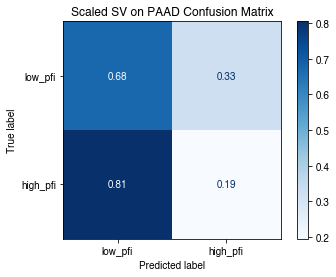

In [272]:
plot_cm(SV_scaled,gene_df,cluster_df['IR'],'Scaled SV on PAAD Confusion Matrix',normalize='true')
plt.savefig('../../prognostic_ML_classifier/SV_PAAD_cm.png', dpi=300)

In [276]:
list(gene_df.columns) == list(X_train.columns)

True